# Analyse résultats concours CCMP

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
seaborn.set()

## Analyse par année MP/PC/PSI

In [3]:
CCMP = pd.DataFrame()
CCMP_stats = pd.DataFrame()

for year in range(2002,2022):
    for filiere in ['MP', 'PC', 'PSI']:
        df = pd.read_csv("../src/stats_generales/"+str(year)+"/"+str(year)+"_"+filiere+".tsv", sep='\t')
        CCMP_y = df.loc[df['banque'].isin(["CONC. COMM. MINES-PONTS","CONCOURS COMMUN MINES-PONTS"])]
        CCMP_s = CCMP_y[-1:]
        CCMP = CCMP.append(CCMP_y)
        CCMP_stats = CCMP_stats.append(CCMP_s)

CCMP_stats = CCMP_stats.set_index('year').replace('¥', 'NaN')
CCMP_stats = CCMP_stats.drop(['banque', 'ecole', 'appeles',
                              'integres_nb', 'integres_filles', 'integres_cinq_demi',
                              'rg_dernier_appele', 'integres_rg_median', 'integres_rg_moyen'], axis=1)

In [4]:
CCMP_stats = CCMP_stats.drop('filiere', axis=1).astype(float)
CCMP_stats_gen = pd.DataFrame(columns=CCMP_stats.columns)

for year in range(2002,2022):
    L = []
    for col in CCMP_stats.columns:
        if col[-2:] == 'nb' or col == 'places':
            L.append(sum(CCMP_stats[CCMP_stats.index == year][col]))
        else:
            if col[:8] == 'inscrits':
                z = 100 * sum(CCMP_stats[CCMP_stats.index == year][col] * CCMP_stats[CCMP_stats.index == year]['inscrits_nb'] / 100)/ sum(CCMP_stats[CCMP_stats.index == year]['inscrits_nb'])
            if col[:11] == 'admissibles':
                z = 100 * sum(CCMP_stats[CCMP_stats.index == year][col] * CCMP_stats[CCMP_stats.index == year]['admissibles_nb'] / 100)/ sum(CCMP_stats[CCMP_stats.index == year]['admissibles_nb'])
            if col[:7] == 'classes':
                z = 100 * sum(CCMP_stats[CCMP_stats.index == year][col] * CCMP_stats[CCMP_stats.index == year]['classes_nb'] / 100)/ sum(CCMP_stats[CCMP_stats.index == year]['classes_nb'])
            if col[:8] == 'integres':
                z = 100 * sum(CCMP_stats[CCMP_stats.index == year][col] * CCMP_stats[CCMP_stats.index == year]['integres_nb'] / 100)/ sum(CCMP_stats[CCMP_stats.index == year]['integres_nb'])
            L.append(z)
    CCMP_stats_gen.loc[year] = L

CCMP_stats_gen = CCMP_stats_gen.round()

In [5]:
CCMP_stats_gen.head(8)

,inscrits_nb,inscrits_filles,inscrits_cinq_demi,admissibles_nb,admissibles_filles,admissibles_cinq_demi,classes_nb,classes_filles,classes_cinq_demi,places
2002,9972.0,22.0,29.0,3309.0,17.0,34.0,3192.0,18.0,35.0,922.0
2003,10511.0,22.0,28.0,3434.0,17.0,31.0,3339.0,17.0,31.0,926.0
2004,10564.0,23.0,28.0,3436.0,19.0,30.0,3330.0,19.0,31.0,906.0
2005,10500.0,23.0,28.0,3414.0,20.0,30.0,3320.0,20.0,30.0,876.0
2006,10496.0,23.0,28.0,3431.0,21.0,32.0,3337.0,21.0,31.0,884.0
2007,10576.0,24.0,29.0,3430.0,19.0,31.0,3329.0,20.0,31.0,885.0
2008,10627.0,23.0,28.0,3494.0,19.0,28.0,3346.0,19.0,28.0,891.0
2009,10913.0,24.0,26.0,3576.0,19.0,28.0,3400.0,19.0,28.0,936.0


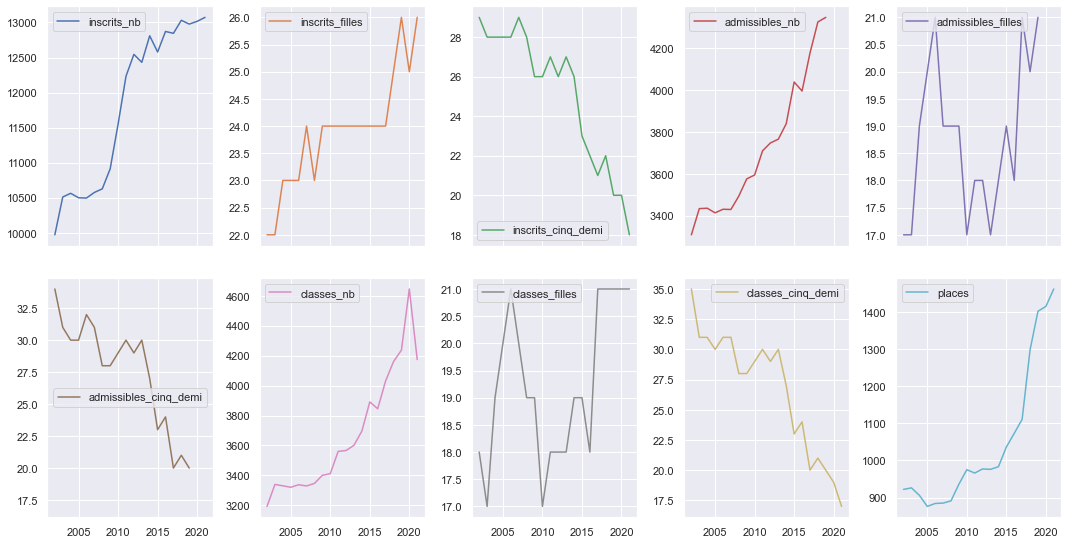

In [5]:
CCMP_stats_gen.plot(subplots=True, layout=(4,5), figsize=(15,15))
plt.tight_layout()
plt.show()

## Analyse par école

In [44]:
TelecomP = CCMP.loc[CCMP['ecole'].isin(["ENST cursus Paris", "ENST Cursus Paris", "Télécom ParisTech","TELECOM ParisTech cursus Paris", "TELECOM Paris cursus Paris", "TELECOM Paris"])].set_index('year').iloc[:,3:].iloc[:,10:17].astype(float)
Ponts = CCMP.loc[CCMP['ecole'].isin(["Ponts et Chaussees", "Ponts et Chaussées","Ponts et Chausses","PONTS ParisTech"])].set_index('year').iloc[:,3:].iloc[:,10:17].astype(float)
SupAero = CCMP.loc[CCMP['ecole'].isin(["SUPAERO Toulouse", "SUPAERO","ISAE-SUPAERO Toulouse","SUPAERO (ISAE) Toulouse"])].set_index('year').iloc[:,3:].iloc[:,10:17].astype(float)
MinesP = CCMP.loc[CCMP['ecole'].isin(["MINES Paris","MINES ParisTech"])].set_index('year').iloc[:,3:].iloc[:,10:17].astype(float)
ENSTA = CCMP.loc[CCMP['ecole'].isin(["Techniques Avancees","Techniques avancées", "Techniques avances","ENSTA ParisTech","ENSTA Paris"])].set_index('year').iloc[:,3:].iloc[:,10:17].astype(float)

CCMP_ecole = [TelecomP, Ponts, SupAero, MinesP, ENSTA]

Ponts.name = 'Ponts'
TelecomP.name = 'TelecomP'
SupAero.name = 'SupAero'
MinesP.name = 'MinesP'
ENSTA.name = 'ENSTA'

Ponts.color = 'gray'
TelecomP.color = 'firebrick'
SupAero.color = 'seagreen'
MinesP.color = 'cornflowerblue'
ENSTA.color = 'midnightblue'

In [45]:
Ponts_gen = pd.DataFrame(columns=Ponts.columns)
TelecomP_gen = pd.DataFrame(columns=TelecomP.columns)
SupAero_gen = pd.DataFrame(columns=SupAero.columns)
MinesP_gen = pd.DataFrame(columns=MinesP.columns)
ENSTA_gen = pd.DataFrame(columns=ENSTA.columns)

CCMP_ecole_gen = [TelecomP_gen, Ponts_gen, SupAero_gen, MinesP_gen, ENSTA_gen]

for i in range(len(CCMP_ecole)):
    ecole = CCMP_ecole[i]
    ecole_gen = CCMP_ecole_gen[i]
    for year in range(2002,2022):
        L = []
        for col in ecole.columns:
            if col[-2:] == 'nb' or col == 'places' or col == 'rg_dernier_appele':
                L.append(sum(ecole[ecole.index == year][col]))
            else:
                if col[:8] == 'integres':
                    z = 100 * sum(ecole[ecole.index == year][col] * ecole[ecole.index == year]['integres_nb'] / 100) / sum(ecole[ecole.index == year]['integres_nb'])
                L.append(z)
        ecole_gen.loc[year] = L

    ecole_gen = ecole_gen.round()
    
Ponts_gen.name = 'Ponts'
TelecomP_gen.name = 'TelecomP'
SupAero_gen.name = 'SupAero'
MinesP_gen.name = 'MinesP'
ENSTA_gen.name = 'ENSTA'

Ponts_gen.color = 'gray'
TelecomP_gen.color = 'firebrick'
SupAero_gen.color = 'seagreen'
MinesP_gen.color = 'cornflowerblue'
ENSTA_gen.color = 'midnightblue'

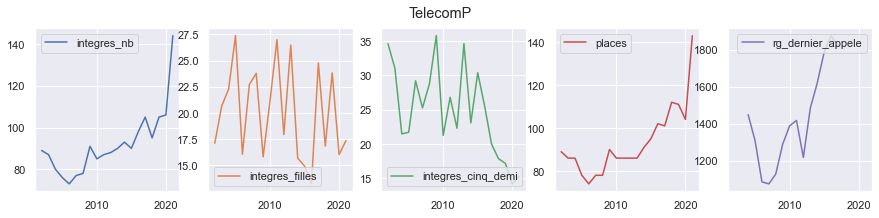

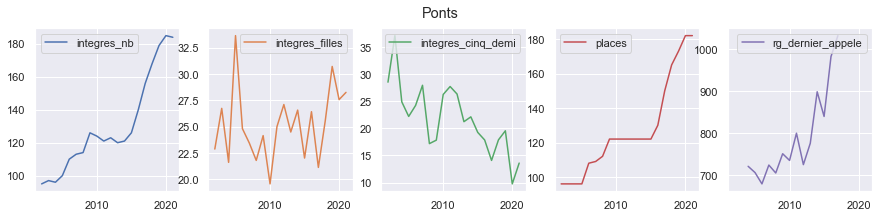

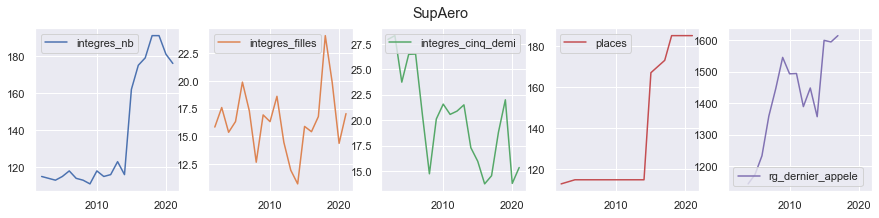

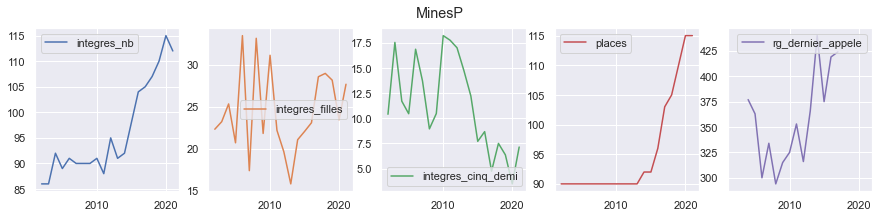

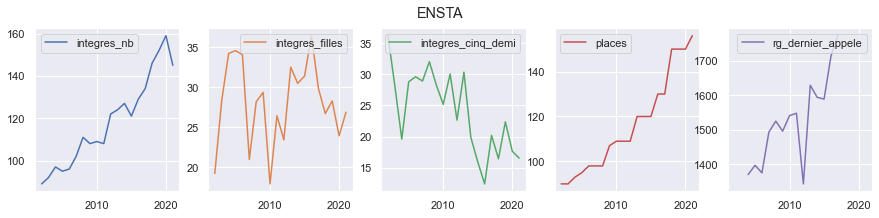

In [49]:
for e in CCMP_ecole_gen:
    e.iloc[:,:5].plot(subplots=True, layout=(1,5), figsize=(15,3), title=e.name)
plt.show()

## Comparaison école

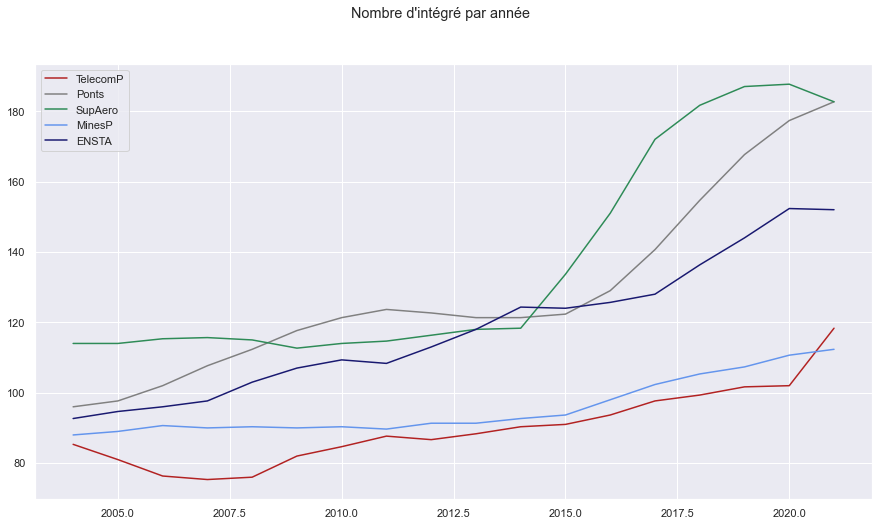

In [52]:
for e in CCMP_ecole_gen:
    e['integres_nb'].rolling(window = 3).mean().plot(subplots=True, figsize=(15,8), label=e.name,
                                                     color = e.color, title = "Nombre d'intégré par année")
plt.legend()
plt.show()

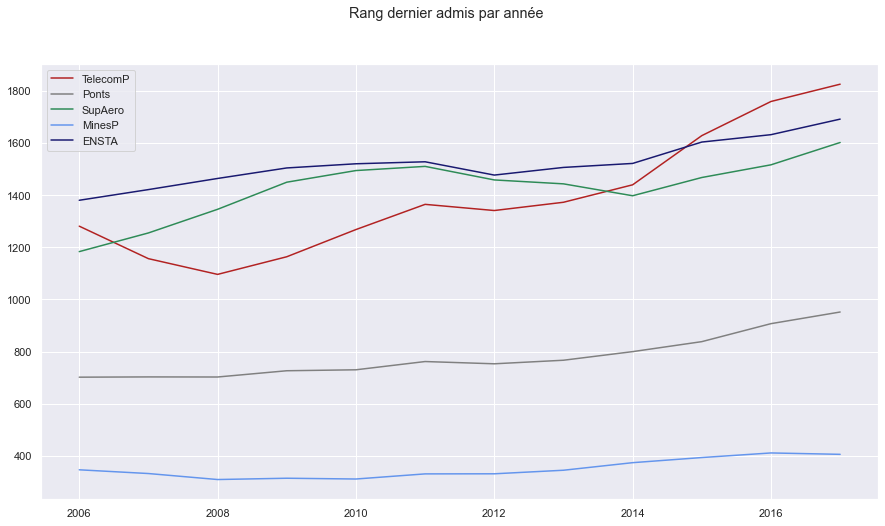

In [58]:
for e in CCMP_ecole_gen:
    e['rg_dernier_appele'].rolling(window = 3).mean().plot(subplots=True, figsize=(15,8), label=e.name,
                                                           color = e.color, title = "Rang dernier admis par année")
plt.legend()
plt.show()

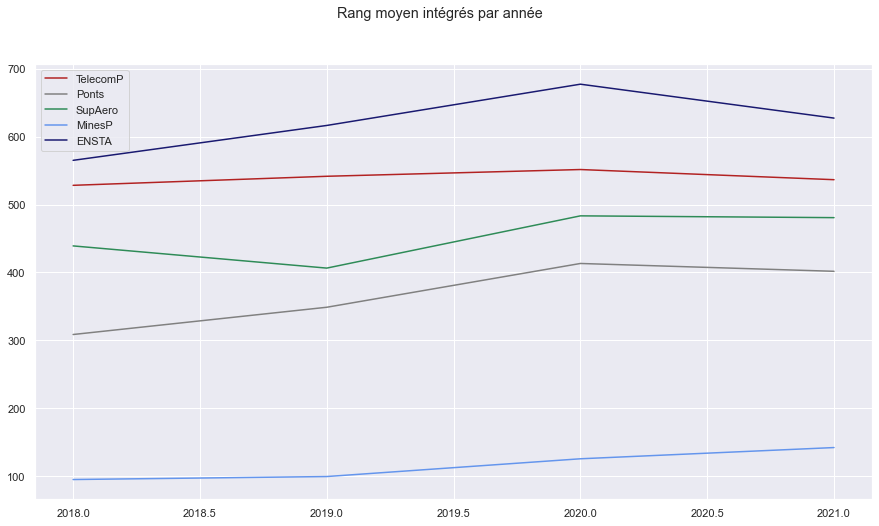

In [57]:
for e in CCMP_ecole_gen:
    e['integres_rg_moyen'].plot(subplots=True, figsize=(15,8), label=e.name,
                                color = e.color, title = "Rang moyen intégrés par année")
plt.legend()
plt.show()

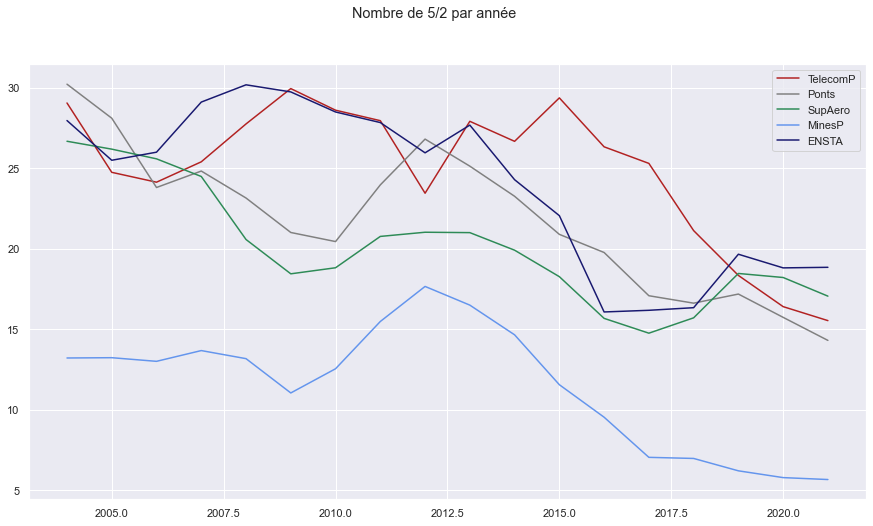

In [56]:
for e in CCMP_ecole_gen:
    e['integres_cinq_demi'].rolling(window = 3).mean().plot(subplots=True, figsize=(15,8), label=e.name,
                                                            color = e.color, title = "Nombre de 5/2 par année")
plt.legend()
plt.show()

## Analyse par filière

In [104]:
'''

Ponts_fil = pd.DataFrame(columns=Ponts.columns)
TelecomP_fil = pd.DataFrame(columns=TelecomP.columns)
SupAero_fil = pd.DataFrame(columns=SupAero.columns)
MinesP_fil = pd.DataFrame(columns=MinesP.columns)
ENSTA_fil = pd.DataFrame(columns=ENSTA.columns)

CCMP_ecole_fil = [TelecomP_fil, Ponts_fil, SupAero_fil, MinesP_fil, ENSTA_fil]

for i in range(len(CCMP_ecole)):
    ecole = CCMP_ecole[i]
    ecole_fil = CCMP_ecole_fil[i]
    ecole_fil = ecole.iloc[::3, :]  #MP
    CCMP_ecole_fil[i] = ecole_fil
    
Ponts_fil.name = 'Ponts'
TelecomP_fil.name = 'TelecomP'
SupAero_fil.name = 'SupAero'
MinesP_fil.name = 'MinesP'
ENSTA_fil.name = 'ENSTA'

Ponts_fil.color = 'gray'
TelecomP_fil.color = 'firebrick'
SupAero_fil.color = 'seagreen'
MinesP_fil.color = 'cornflowerblue'
ENSTA_fil.color = 'midnightblue'

'''